In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

planets = sns.load_dataset('planets')

In [3]:
planets.shape

(1035, 6)

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [6]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [7]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)})
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [8]:
L = [0, 1, 0, 1, 2, 0]      #This groupby using an outer list links the data associated with 0 together, adds the sum, 
print(df.groupby(L).sum())  #does the one of 1 and 2 the same way

   data1  data2
0      7     17
1      4      3
2      4      7


In [9]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

In [10]:
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: decade, Length: 1035, dtype: object

In [11]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [12]:
titanic = sns.load_dataset('titanic')

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [15]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [16]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [29]:
pd.cut([1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 4, 10])  #This is to show how the cut function works, it kinda divides the array 
                                                #into discrete intervals, 1-4, and 4-10 in this scenario

[NaN, (1.0, 4.0], (1.0, 4.0], (1.0, 4.0], (4.0, 10.0], (4.0, 10.0], (4.0, 10.0], (4.0, 10.0], (4.0, 10.0]]
Categories (2, interval[int64]): [(1, 4] < (4, 10]]

In [30]:
age = pd.cut(titanic['age'], [0, 18, 80])

In [33]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [41]:
pd.qcut([1, 2, 3, 4, 5, 6, 10, 12], 2)

[(0.999, 4.5], (0.999, 4.5], (0.999, 4.5], (0.999, 4.5], (4.5, 12.0], (4.5, 12.0], (4.5, 12.0], (4.5, 12.0]]
Categories (2, interval[float64]): [(0.999, 4.5] < (4.5, 12.0]]

In [42]:
fare = pd.qcut(titanic['fare'], 2)

In [47]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [50]:
titanic.pivot_table(index = 'sex', columns = 'class')

adult_male                            age                        \
class       First    Second     Third      First     Second      Third   
sex                                                                      
female    0.00000  0.000000  0.000000  34.611765  28.722973  21.750000   
male      0.97541  0.916667  0.919308  41.281386  30.740707  26.507589   

           alone                            fare  ...     parch pclass         \
class      First    Second     Third       First  ...     Third  First Second   
sex                                               ...                           
female  0.361702  0.421053  0.416667  106.125798  ...  0.798611      1      2   
male    0.614754  0.666667  0.760807   67.226127  ...  0.224784      1      2   

                 sibsp                      survived                      
class  Third     First    Second     Third     First    Second     Third  
sex                                                                       
female     3  0.553191  0.486842  0.895833  0.968085  0.921053  0.500000  
male       3  0.311475  0.342593  0.498559  0.368852  0.157407  0.135447  

[2 rows x 24 columns]

In [51]:
titanic.pivot_table(index = 'sex', columns = 'class', aggfunc = {'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [53]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [55]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins = True, margins_name = 'All genders')

class,First,Second,Third,All genders
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All genders,0.629630,0.472826,0.242363,0.383838


In [74]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [75]:
births['decade'] = 10 * (births['year'] // 10)
births['decade'] = births['decade'].astype(str) + 's'

In [76]:
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = sum)

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


Text(0, 0.5, 'Total births per year')

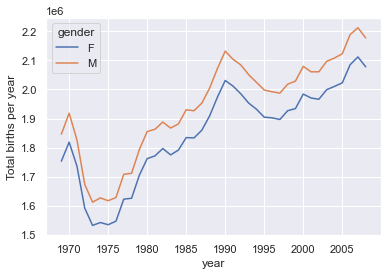

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  #Use Seaborn styles

births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('Total births per year')

In [78]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [79]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [80]:
births['day'] = births['day'].astype(int)
births['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [82]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960s,2
1969-01-01,1969,1,1,M,4440,1960s,2
1969-01-02,1969,1,2,F,4454,1960s,3
1969-01-02,1969,1,2,M,4548,1960s,3
1969-01-03,1969,1,3,F,4548,1960s,4


<ipython-input-86-3e421a55ef0f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([0, 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'mean births by day')

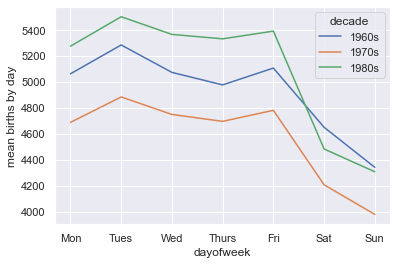

In [86]:
import matplotlib.pyplot as plt

births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels([0, 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [87]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [88]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

births_by_date.head()

<ipython-input-88-a21707179326>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<AxesSubplot:>

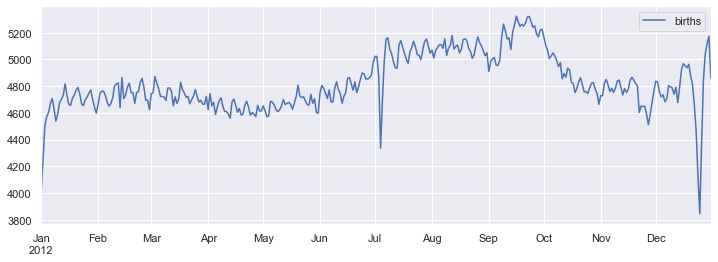

In [89]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

In [90]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)

names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [91]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [93]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [96]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [99]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [100]:
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [101]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [103]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [104]:
full_monte = pd.DataFrame({'name': monte,
                          'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})

full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [105]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1
